### 第七次作业

Task 0: 编码应用，与pandas计算tf-idf值：

In [93]:
import jieba
with open("data/红楼梦part.txt", "r", encoding="gbk", errors="ignore") as fin:
    with open("data/红楼梦part.utf8.txt", "wb") as fout:
        for line in fin:
            # 此处ignore表示遇到无法解码时，忽视该错误
            line = line.encode("utf-8", "ignore")
            fout.write(line)
            
with open("data/三国演义part.txt", "r", encoding="utf-8") as fin:
    with open("data/三国演义part.cut.txt", "w", encoding="utf-8") as fout:
        # 完成切词，并空格分隔，写入文件
        for line in fin:
            seg_list = jieba.cut(line)
            line = ' '.join(seg_list)
            fout.write(line)
print("Finish!")

Finish!


In [322]:
# 这里可以过滤标点符号，不强制要求，关键掌握df操作
import pandas as pd
import numpy as np
with open("data/三国演义part.cut.txt", "r", encoding="utf-8") as fx:
    with open("data/红楼梦part.utf8.txt", "r", encoding="utf-8") as fy:
        fx_word_list = " ".join(fx.readlines()).split()
        fy_word_list = " ".join(fy.readlines()).split()
        
        padding_length = max(len(fx_word_list), len(fy_word_list))
        
        fx_word_list = fx_word_list + [np.nan for _ in range(padding_length - len(fx_word_list))]
        fy_word_list = fy_word_list + [np.nan for _ in range(padding_length - len(fy_word_list))]
        #print(fx_word_list)
        df = pd.DataFrame({"fx": fx_word_list, "fy": fy_word_list})
        
df.head()

,fx,fy
0,时,一日
1,巨鹿郡,，
2,有,正当
3,兄弟,嗟
4,三人,悼


df.head

![jupyter](./figs/dfhead.png)

In [323]:
# 基于pandas.DataFrame的count操作，完成词频统计，并计算tf-idf值
# 提示：先对适当维度groupby，然后count
# code here
a1 = df.groupby('fx').count()
a2 = df.groupby('fy').count()
a = pd.concat([a1, a2], axis=1, sort=True)
a

,fy,fx
“,11.0,NaN
”,11.0,NaN
、,10.0,NaN
。,24.0,14.0
《,1.0,NaN
》,1.0,NaN
「,NaN,5.0
」,NaN,5.0
『,NaN,1.0
』,NaN,1.0


完成count操作后

![jupyter](./figs/cnt.png)

In [324]:
# 对行做count操作，计算每个词出现次数，用于idf计算
# code here
a['appear'] = a.apply(lambda line: sum([1 if x != 0 else 0 for x in line]), axis=1)

In [327]:
# 运用之前得到的词频+出现次数，计算tf-idf值
a['fx']=a['fx']/a['fx'].sum()
a['fy']=a['fy']/a['fy'].sum()
a["idf"] = np.log((3+1) / (a["appear"]+1)) + 1
a["fx"] = a["fx"] * a["idf"]
a["fy"] = a["fy"] * a["idf"]
a

,fy,fx,appear,idf
“,0.034562,NaN,2,1.287682
”,0.034562,NaN,2,1.287682
、,0.031420,NaN,2,1.287682
。,0.075408,0.044623,2,1.287682
《,0.003142,NaN,2,1.287682
》,0.003142,NaN,2,1.287682
「,NaN,0.015937,2,1.287682
」,NaN,0.015937,2,1.287682
『,NaN,0.003187,2,1.287682
』,NaN,0.003187,2,1.287682


Task 1: 通过Trie树字频统计和pandas库计算三类英文文章的tf-idf值，注意此处对每个单词要求通过lemmatizer提取词干，并过滤原文中带有非英文字母的单词，停用词可以过滤也可以不过滤，最后用LDA提取特征并用KMeans聚类。

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import pandas as pd
import numpy as np
import pickle
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [105]:
class Trie:
    class Node:
        def __init__(self, char):
            """
            self.children: a map, char => Node
            self.char: char of this node
            """
            self.children = {}
            self.char = char
            self.cnt = 0

    def __init__(self):
        self.head = self.Node("")

    def find(self, key):
        node = self.head
        for char in key:
            if char in node.children:
                node = node.children[char]
            else:
                return None
        return node.cnt

    def insert(self, key):
        node = self.head
        for char in key:
            if char not in node.children:
                node.children[char] = self.Node(char)
            node = node.children[char]
        node.cnt += 1

    def delete(self, key):
        node = self.head
        for char in key:
            if char in node.children:
                node = node.children[char]
            else:
                return None
        node.cnt -= 1

    def info(self):
        # 0. 遍历Trie树
        info = {}
        
        def dfs(node, pref):
            cur_char = node.char
            new_pref = pref + cur_char
            if node.cnt > 0:
                info[new_pref] = node.cnt
            for n in node.children.values():
                dfs(n, new_pref)
        dfs(self.head, '') 
        return info


In [106]:
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return nltk.corpus.wordnet.ADJ
    elif tag.startswith('V'):
        return nltk.corpus.wordnet.VERB
    elif tag.startswith('N'):
        return nltk.corpus.wordnet.NOUN
    elif tag.startswith('R'):
        return nltk.corpus.wordnet.ADV
    else:
        return " "


def lemmatize(word, pos):
    try:
        tag = get_wordnet_pos(pos)
        return lemmatizer.lemmatize(word, tag)
    except Exception as e:
        return lemmatizer.lemmatize(word)

In [107]:
stop_word_set = set(stopwords.words("english"))

In [240]:
def count(paragraph):
    my_trie = Trie()
    
    # 1. 这部分完成对当前paragraph做字频统计，并生成对应Trie树
    sent_list = sent_tokenize(paragraph)
    for sent in sent_list:
        word_list = word_tokenize(sent)
        word_pos = filter(lambda pair: pair[0].isalpha(), nltk.pos_tag(word_list))
        word_ori = [lemmatize(word.lower(), pos) for word, pos in word_pos]
        for word in word_ori:
            my_trie.insert(word)
                  
                    
    return my_trie

In [241]:
def make_df(my_trie, doc_name):
    # 2. 这部分完成将trie树转化为dataframe，列索引为当前文章对应名称（自由选定），行索引为对应单词，表格中内容为词出现次数
    info = my_trie.info()
    my_df = pd.DataFrame(info.values(), columns=[doc_name], index=info.keys())
    return my_df

In [242]:
def merge_df(df_x, df_y):
    # 3. 将两个df合并，按照index合并即可，取并集
    new_df = df_x.merge(df_y, left_on=df_x.index, right_on=df_y.index, how='outer')
    return new_df

In [243]:
good_essay, middle_essay, bad_essay = pickle.load(open("data/essay.pkl", "rb"))

In [244]:
df_list = []
for i, e in enumerate(good_essay):
    cur_trie = count(e)
    cur_df = make_df(cur_trie, "good{}".format(i))
    df_list.append(cur_df)


In [245]:
for i, e in enumerate(middle_essay):
    cur_trie = count(e)
    cur_df = make_df(cur_trie, "mid{}".format(i))
    df_list.append(cur_df)

In [246]:
for i, e in enumerate(bad_essay):
    cur_trie = count(e)
    cur_df = make_df(cur_trie, "bad{}".format(i))
    df_list.append(cur_df)

In [247]:
for i in range(len(df_list)):
    df_list[i] = df_list[i].reset_index()

In [249]:
# 4. 将所有dataframe合并为一张表
# 提示：可以采用reduce操作（python3中reduce需要额外import）
from functools import reduce
all_df = reduce(lambda left, right: pd.merge(left, right, on='index', how='outer'), df_list)

In [250]:
all_df = all_df.fillna(0)
all_df = all_df.set_index(['index'])
all_df

,good0,good1,good2,good3,good4,good5,good6,good7,good8,good9,...,bad90,bad91,bad92,bad93,bad94,bad95,bad96,bad97,bad98,bad99
index,,,,,,,,,,,,,,,,,,,,,
dear,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
decrease,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
do,2.0,4.0,3.0,6.0,3.0,9.0,5.0,2.0,4.0,3.0,...,6.0,3.0,2.0,0.0,3.0,9.0,4.0,1.0,6.0,2.0
down,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
different,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0
the,17.0,20.0,11.0,18.0,15.0,11.0,24.0,11.0,7.0,19.0,...,5.0,14.0,23.0,5.0,4.0,18.0,11.0,13.0,21.0,13.0
they,9.0,3.0,4.0,4.0,3.0,8.0,5.0,1.0,3.0,2.0,...,1.0,1.0,6.0,4.0,6.0,3.0,8.0,0.0,7.0,0.0
their,5.0,1.0,4.0,2.0,2.0,0.0,1.0,3.0,0.0,4.0,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,3.0
these,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [328]:
# 5. 在all_df内部计算tf-idf值
for i in all_df.columns:
    all_df[i] = all_df[i] / all_df[i].sum()
all_df['appear'] = all_df.apply(lambda line: sum([1 if x != 0 else 0 for x in line]), axis=1)
import numpy as np
all_df["idf"] = np.log((all_df.columns.size) / (all_df["appear"]+1)) + 1
all_df

,good0,good1,good2,good3,good4,good5,good6,good7,good8,good9,...,bad92,bad93,bad94,bad95,bad96,bad97,bad98,bad99,appear,idf
index,,,,,,,,,,,,,,,,,,,,,
dear,0.000791,0.000989,0.000940,0.000000,0.001091,0.000881,0.000000,0.000953,0.001154,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,151,1.686546
decrease,0.006641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7,4.630985
do,0.000689,0.001724,0.001229,0.002892,0.001426,0.003456,0.001662,0.000831,0.002012,0.000881,...,0.001110,0.000000,0.001953,0.003298,0.002696,0.000719,0.002237,0.001025,268,1.115716
down,0.002117,0.000000,0.000000,0.002960,0.000000,0.002358,0.002041,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.004418,0.000000,0.000000,52,2.740135
different,0.003443,0.000000,0.002045,0.000000,0.000000,0.000000,0.000000,0.002074,0.000000,0.000000,...,0.000000,0.000000,0.006503,0.001830,0.000000,0.000000,0.001862,0.000000,68,2.476321
the,0.004961,0.007297,0.003814,0.007344,0.006034,0.003576,0.006753,0.003868,0.002980,0.004722,...,0.010810,0.003926,0.002205,0.005583,0.006276,0.007916,0.006629,0.005640,293,1.026847
they,0.003408,0.001420,0.001800,0.002118,0.001566,0.003375,0.001826,0.000456,0.001657,0.000645,...,0.003659,0.004076,0.004292,0.001208,0.005923,0.000000,0.002867,0.000000,254,1.169163
their,0.003471,0.000868,0.003299,0.001941,0.001914,0.000000,0.000669,0.002509,0.000000,0.002365,...,0.000000,0.000000,0.000000,0.000738,0.000000,0.000000,0.001502,0.003096,168,1.580528
these,0.001004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003234,0.000000,0.000000,0.000000,0.000000,0.000000,0.001086,0.001493,122,1.898243


In [329]:
for i in all_df.columns:
    if i == 'appear':
        break
    all_df[i] = all_df[i] * all_df['idf']

In [330]:
matrix = all_df.values
matrix = matrix.T
matrix = np.matrix(matrix[:300, :])
target = [int(i/100) for i in range(300)]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


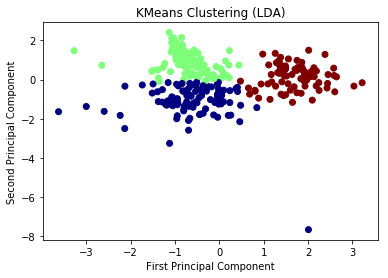

In [331]:
# 6. 通过LDA分类并KMeans聚类
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
# Taking in as second argument the Target as labels
X_LDA_2D = lda.fit_transform(matrix, target)

kmeans = KMeans(n_clusters=3)

X_clustered = kmeans.fit_predict(X_LDA_2D)

fig = plt.figure()
ax1 = fig.add_subplot(111)
#设置标题
ax1.set_title('KMeans Clustering (LDA)')
#设置X轴标签
plt.xlabel('First Principal Component')
#设置Y轴标签
plt.ylabel('Second Principal Component')
#画散点图
ax1.scatter(X_LDA_2D[:,0],X_LDA_2D[:,1],c = X_clustered, cmap='jet', marker = 'o')
#显示所画的图
plt.show()


Task 2: 读取《红楼梦》（已分词）与《红楼梦》人物名称，统计每句话中共现次数，形成共现矩阵，

In [383]:
# 1. 读取《红楼梦》人物名称，统计不同人物个数，注意可能同一个人有几种名称，在名称文件中用“-”分隔
person_num = 0
with open("data/hlm_name.txt", encoding="utf-8") as f:
    name_list = ' '.join(f.readlines()).split()
    s = f.readlines()
    df = pd.DataFrame(name_list, columns=['names'])
person_num = df.shape[0]

In [381]:
#用来减少循环
my_name_list = []
for i in name_list:
    if '-' in i:
        tmp = i.split('-')
        for name in tmp:
            my_name_list.append(name)
    else:
        my_name_list.append(i)


In [391]:
# 2. 读取《红楼梦》文本，已经分词，通过“。”分隔句子，统计每句中人物共现次数，生成共现矩阵
matrix = np.zeros((person_num, person_num))
#fy_word_list = " ".join(fy.readlines()).split()
with open("data/红楼梦.txt", encoding="utf-8") as f:
    s = f.readlines()
    sent_list = []
    for i in s:
        sent_list +=  ' '.join(sent_tokenize(i)).split('。')

In [399]:
for i in range(len(sent_list)):
    word_list = sent_list[i].split()
    #把每个句子中的词语拿出来，看它是不是人名，如果是，找下一个名字，如果找见，则共现矩阵对应位置+1
    for j in range(len(word_list)):
        if word_list[j] not in my_name_list:
            continue
        for k in range(len(name_list)):
            #确定对应人名的位置，通过找字串的方法
            if name_list[k].find(word_list[j]) != -1:
                pos1 = k
                #找下一个名字
                for l in range(j + 1, len(word_list)):
                    if word_list[l] not in my_name_list:
                        continue
                    for m in range(len(name_list)):
                        if name_list[m].find(word_list[l]) != -1:
                            pos2 = m
                            matrix[pos1][pos2] += 1
                            matrix[pos2][pos1] += 1

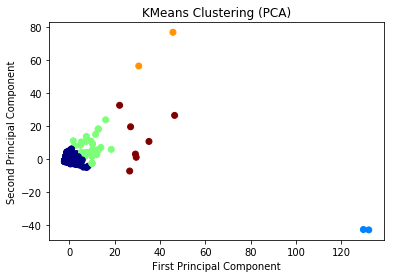

In [404]:
# 3. （基本）通过PCA降维，并KMeans聚类，绘制plot散点图
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(matrix)
pca = PCA(n_components=2)
pca.fit(X_std)
X_2d = pca.transform(X_std)

kmeans = KMeans(n_clusters=5)
X_clustered = kmeans.fit_predict(X_2d)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title('KMeans Clustering (PCA)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
ax1.scatter(X_2d[:,0],X_2d[:,1],c = X_clustered, cmap='jet', marker = 'o')
plt.show()

In [405]:
# 3++. （加分）思考其他人物关系聚类、可视化方案